In [2]:
import numpy as np
import os
import pickle
import matplotlib.pylab as plt

save_dir = '/home/lagoon/Project/ml_albert_no/Result/multiStep/'
dir_list = os.listdir(save_dir)
for dir_name in dir_list:
    l_load_dir = os.listdir( save_dir + dir_name)
    load_dir = save_dir + dir_name + '/'  + l_load_dir[0] 
    train_acc = np.load(load_dir + '/np_train_acc_list.npy', allow_pickle=True)
    test_acc = np.load(load_dir + '/np_test_acc_list.npy', allow_pickle=True)
    train_loss = np.load(load_dir + '/np_train_loss_list.npy', allow_pickle=True)
    test_loss = np.load(load_dir + '/np_test_loss_list.npy', allow_pickle=True)

    with open( load_dir + '/hyper.pickle', 'rb') as fr:
        hyper_param_load = pickle.load(fr)
    hyper_param_dict = hyper_param_load

    # plt.plot(np.arange(0, train_acc.shape[0]), train_acc, label=  'lr = ' + str(hyper_param_load['lr']))
    plt.plot(np.arange(0, train_acc.shape[0]), train_acc, label= dir_name)
plt.legend()
plt.title('Train Acc')
plt.show()




for dir_name in dir_list:
    l_load_dir = os.listdir( save_dir + dir_name)
    load_dir = save_dir + dir_name + '/'  + l_load_dir[0] 
    train_acc = np.load(load_dir + '/np_train_acc_list.npy', allow_pickle=True)
    test_acc = np.load(load_dir + '/np_test_acc_list.npy', allow_pickle=True)
    train_loss = np.load(load_dir + '/np_train_loss_list.npy', allow_pickle=True)
    test_loss = np.load(load_dir + '/np_test_loss_list.npy', allow_pickle=True)

    with open( load_dir + '/hyper.pickle', 'rb') as fr:
        hyper_param_load = pickle.load(fr)
    hyper_param_dict = hyper_param_load

    # plt.plot(np.arange(0, train_acc.shape[0]), train_acc, label=  'lr = ' + str(hyper_param_load['lr']))
    plt.plot(np.arange(0, test_acc.shape[0]), test_acc, label= dir_name)
    print(dir_name, ':', train_acc, '\n', test_acc, '\n')
    
plt.legend()
plt.title('Test Acc')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/lagoon/Project/ml_albert_no/Result/multiStep/GoogLeNet_w_bn/19_23_53/np_train_acc_list.npy'

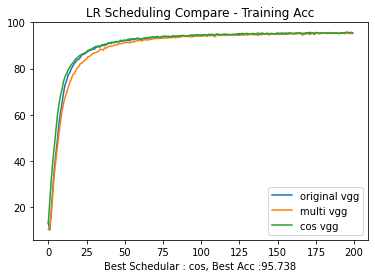

[original] Best Acc : 95.732
[multi] Best Acc : 95.57600000000001
[cos] Best Acc : 95.738


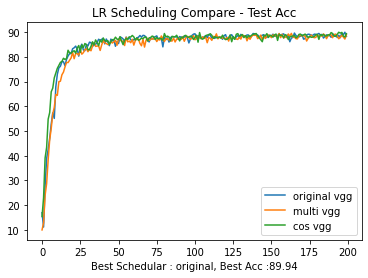

[original] Best Acc : 89.94
[multi] Best Acc : 89.47
[cos] Best Acc : 89.94


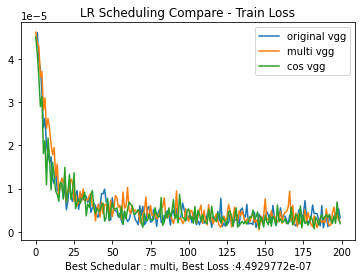

[original] Best Acc : 9.404660659129149e-07
[multi] Best Acc : 4.492977154768596e-07
[cos] Best Acc : 7.016555514383072e-07


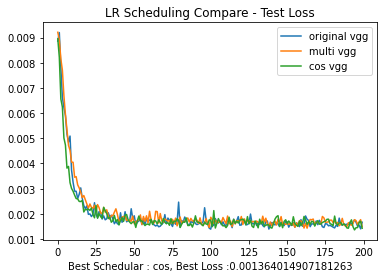

[original] Best Acc : 0.0013937950968742371
[multi] Best Acc : 0.001433384869992733
[cos] Best Acc : 0.001364014907181263


In [16]:
import numpy as np
import pickle
import matplotlib.pylab as plt
import torch

basic_vgg13 = '/home/lagoon/Project/ml_albert_no/Result_GCP/Original/VGG13/19_16_0'
basic_googlenet = '/home/lagoon/Project/ml_albert_no/Result_GCP/Original/GoogLeNet/19_16_31'
basic_googlenet_wbn = '/home/lagoon/Project/ml_albert_no/Result_GCP/Original/GoogLeNet_w_bn/19_17_47'


multi_vgg13 = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/VGG13/20_1_16'
multi_googlenet = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/GoogLeNet/20_1_54'
multi_googlenet_wbn = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/GoogLeNet_w_bn/20_3_30'
multi_resnet18 = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/ResNet18/20_5_18'
multi_resnet34 = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/ResNet34/20_6_0'

cos_vgg13 = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/VGG13/20_1_16'
cos_googlenet = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/GoogLeNet/20_1_53'
cos_googlenet_wbn = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/GoogLeNet_w_bn/20_3_28'
cos_resnet18 = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/ResNet18/20_5_16'
cos_resnet34 = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/ResNet34/20_5_58'

train_tensor_to_numpy = np.vectorize(lambda x: x.detach().to('cpu').numpy())
schedule_list = ['original', 'multi', 'cos']


### train acc ###

np_basic_vgg13 = np.load(basic_vgg13 + '/np_train_acc_list.npy')
np_multi_vgg13 = np.load(multi_vgg13 + '/np_train_acc_list.npy')
np_cos_vgg13 = np.load(cos_vgg13 + '/np_train_acc_list.npy')

best_list = np.array([np.max(np_basic_vgg13), np.max(np_multi_vgg13), np.max(np_cos_vgg13) ])
best_acc = np.max( best_list )
best_index = np.argmax( best_list )

plt.title('LR Scheduling Compare - Training Acc')
plt.plot(np_basic_vgg13, label= 'original vgg')
plt.plot(np_multi_vgg13, label= 'multi vgg')
plt.plot(np_cos_vgg13, label= 'cos vgg')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Acc :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


### test acc ####

np_basic_vgg13 = np.load(basic_vgg13 + '/np_test_acc_list.npy')
np_multi_vgg13 = np.load(multi_vgg13 + '/np_test_acc_list.npy')
np_cos_vgg13 = np.load(cos_vgg13 + '/np_test_acc_list.npy')

best_list = np.array([np.max(np_basic_vgg13), np.max(np_multi_vgg13), np.max(np_cos_vgg13) ])
best_acc = np.max( best_list )
best_index = np.argmax( best_list )

plt.title('LR Scheduling Compare - Test Acc')
plt.plot(np_basic_vgg13, label= 'original vgg')
plt.plot(np_multi_vgg13, label= 'multi vgg')
plt.plot(np_cos_vgg13, label= 'cos vgg')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Acc :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


### train loss ####

np_basic_vgg13 = np.load(basic_vgg13 + '/np_train_loss_list.npy', allow_pickle=True)
np_multi_vgg13 = np.load(multi_vgg13 + '/np_train_loss_list.npy', allow_pickle=True)
np_cos_vgg13 = np.load(cos_vgg13 + '/np_train_loss_list.npy', allow_pickle=True)


np_basic_vgg13 = train_tensor_to_numpy(np_basic_vgg13)
np_multi_vgg13 = train_tensor_to_numpy(np_multi_vgg13)
np_cos_vgg13 = train_tensor_to_numpy(np_cos_vgg13)

best_list = np.array([np.min(np_basic_vgg13), np.min(np_multi_vgg13), np.min(np_cos_vgg13) ])
best_acc = np.min( best_list )
best_index = np.argmin( best_list )

plt.title('LR Scheduling Compare - Train Loss')
plt.plot(np_basic_vgg13, label= 'original vgg')
plt.plot(np_multi_vgg13, label= 'multi vgg')
plt.plot(np_cos_vgg13, label= 'cos vgg')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Loss :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


### test loss ####

np_basic_vgg13 = np.load(basic_vgg13 + '/np_test_loss_list.npy', allow_pickle=True)
np_multi_vgg13 = np.load(multi_vgg13 + '/np_test_loss_list.npy', allow_pickle=True)
np_cos_vgg13 = np.load(cos_vgg13 + '/np_test_loss_list.npy', allow_pickle=True)

best_list = np.array([np.min(np_basic_vgg13), np.min(np_multi_vgg13), np.min(np_cos_vgg13) ])
best_acc = np.min( best_list )
best_index = np.argmin( best_list )

plt.title('LR Scheduling Compare - Test Loss')
plt.plot(np_basic_vgg13, label= 'original vgg')
plt.plot(np_multi_vgg13, label= 'multi vgg')
plt.plot(np_cos_vgg13, label= 'cos vgg')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Loss :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


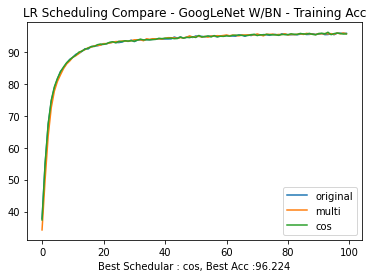

[original] Best Acc : 95.926
[multi] Best Acc : 95.988
[cos] Best Acc : 96.224


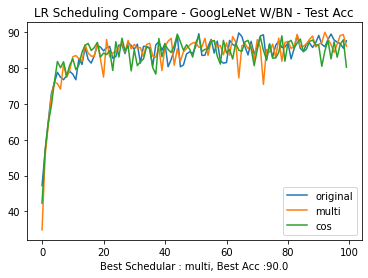

[original] Best Acc : 89.81
[multi] Best Acc : 90.0
[cos] Best Acc : 89.48


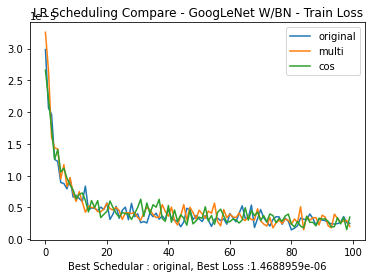

[original] Best Acc : 1.4688959026898374e-06
[multi] Best Acc : 1.4959537111280952e-06
[cos] Best Acc : 1.5167435094554094e-06


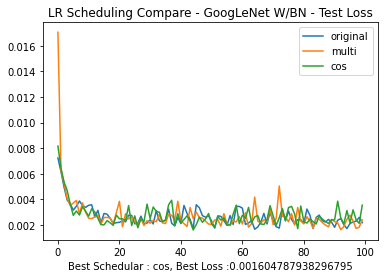

[original] Best Acc : 0.0016553630709648132
[multi] Best Acc : 0.0016246703147888184
[cos] Best Acc : 0.001604787938296795


In [22]:
import numpy as np
import pickle
import matplotlib.pylab as plt
import torch

basic_vgg13 = '/home/lagoon/Project/ml_albert_no/Result_GCP/Original/VGG13/19_16_0'
basic_googlenet = '/home/lagoon/Project/ml_albert_no/Result_GCP/Original/GoogLeNet/19_16_31'
basic_googlenet_wbn = '/home/lagoon/Project/ml_albert_no/Result_GCP/Original/GoogLeNet_w_bn/19_17_47'


multi_vgg13 = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/VGG13/20_1_16'
multi_googlenet = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/GoogLeNet/20_1_54'
multi_googlenet_wbn = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/GoogLeNet_w_bn/20_3_30'
multi_resnet18 = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/ResNet18/20_5_18'
multi_resnet34 = '/home/lagoon/Project/ml_albert_no/Result_v2/multiStep/ResNet34/20_6_0'

cos_vgg13 = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/VGG13/20_1_16'
cos_googlenet = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/GoogLeNet/20_1_53'
cos_googlenet_wbn = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/GoogLeNet_w_bn/20_3_28'
cos_resnet18 = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/ResNet18/20_5_16'
cos_resnet34 = '/home/lagoon/Project/ml_albert_no/Result_v2/CosWarmUp/ResNet34/20_5_58'

train_tensor_to_numpy = np.vectorize(lambda x: x.detach().to('cpu').numpy())
schedule_list = ['original', 'multi', 'cos']

basic = basic_googlenet_wbn
multi = multi_googlenet_wbn
cos = cos_googlenet_wbn

model_name = 'GoogLeNet W/BN'

### train acc ###

np_basic_vgg13 = np.load(basic + '/np_train_acc_list.npy')
np_multi_vgg13 = np.load(multi + '/np_train_acc_list.npy')
np_cos_vgg13 = np.load(cos + '/np_train_acc_list.npy')

best_list = np.array([np.max(np_basic_vgg13), np.max(np_multi_vgg13), np.max(np_cos_vgg13) ])
best_acc = np.max( best_list )
best_index = np.argmax( best_list )

plt.title('LR Scheduling Compare - ' + model_name + ' - Training Acc')
plt.plot(np_basic_vgg13, label= 'original')
plt.plot(np_multi_vgg13, label= 'multi')
plt.plot(np_cos_vgg13, label= 'cos')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Acc :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


### test acc ####

np_basic_vgg13 = np.load(basic + '/np_test_acc_list.npy')
np_multi_vgg13 = np.load(multi + '/np_test_acc_list.npy')
np_cos_vgg13 = np.load(cos + '/np_test_acc_list.npy')

best_list = np.array([np.max(np_basic_vgg13), np.max(np_multi_vgg13), np.max(np_cos_vgg13) ])
best_acc = np.max( best_list )
best_index = np.argmax( best_list )

plt.title('LR Scheduling Compare - ' + model_name + ' - Test Acc')
plt.plot(np_basic_vgg13, label= 'original')
plt.plot(np_multi_vgg13, label= 'multi')
plt.plot(np_cos_vgg13, label= 'cos')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Acc :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


### train loss ####

np_basic_vgg13 = np.load(basic + '/np_train_loss_list.npy', allow_pickle=True)
np_multi_vgg13 = np.load(multi + '/np_train_loss_list.npy', allow_pickle=True)
np_cos_vgg13 = np.load(cos + '/np_train_loss_list.npy', allow_pickle=True)


np_basic_vgg13 = train_tensor_to_numpy(np_basic_vgg13)
np_multi_vgg13 = train_tensor_to_numpy(np_multi_vgg13)
np_cos_vgg13 = train_tensor_to_numpy(np_cos_vgg13)

best_list = np.array([np.min(np_basic_vgg13), np.min(np_multi_vgg13), np.min(np_cos_vgg13) ])
best_acc = np.min( best_list )
best_index = np.argmin( best_list )

plt.title('LR Scheduling Compare - ' + model_name + ' - Train Loss')
plt.plot(np_basic_vgg13, label= 'original')
plt.plot(np_multi_vgg13, label= 'multi')
plt.plot(np_cos_vgg13, label= 'cos')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Loss :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')


### test loss ####

np_basic_vgg13 = np.load(basic + '/np_test_loss_list.npy', allow_pickle=True)
np_multi_vgg13 = np.load(multi + '/np_test_loss_list.npy', allow_pickle=True)
np_cos_vgg13 = np.load(cos + '/np_test_loss_list.npy', allow_pickle=True)

best_list = np.array([np.min(np_basic_vgg13), np.min(np_multi_vgg13), np.min(np_cos_vgg13) ])
best_acc = np.min( best_list )
best_index = np.argmin( best_list )

plt.title('LR Scheduling Compare - ' + model_name + ' - Test Loss')
plt.plot(np_basic_vgg13, label= 'original')
plt.plot(np_multi_vgg13, label= 'multi')
plt.plot(np_cos_vgg13, label= 'cos')
plt.xlabel('Best Schedular : ' + schedule_list[best_index] + ', Best Loss :' + str(best_acc))
plt.legend()
plt.show()

for i, name in enumerate(schedule_list):
    print(f'[{name}] Best Acc : {best_list[i]}')
